<a href="https://colab.research.google.com/github/kokchun/Machine-learning-AI22/blob/main/Lecture_code/L7-gridsearchCV.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; for interacting with the code


---
# Lecture notes - GridSearchCV
---

This is the lecture note for **GridSearchCV**

<p class = "alert alert-info" role="alert"><b>Note</b> that this lecture note gives a brief introduction to GridSearchCV. I encourage you to read further about GridSearchCV. </p>

Read more:

- [GridSearchCV docs - sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
- [Pipeline docs - sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)
- [GridSearchCV user guide - sklearn](https://scikit-learn.org/stable/modules/grid_search.html#grid-search)
- [Pipeline user guide - sklearn](https://scikit-learn.org/stable/modules/compose.html#pipeline)

---


In [2]:
from sklearn.datasets import load_wine
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

plt.style.use("classic")

In [3]:
wine = load_wine()

df = pd.DataFrame(wine.data, columns = wine.feature_names)
df = pd.concat([df, pd.DataFrame(wine.target, columns = ["wine_class"])], axis = 1)
df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


---
## Train|test split

In [4]:
from sklearn.model_selection import train_test_split

X, y = df.drop("wine_class", axis=1), df["wine_class"]
# use the same test set as in previous lecture
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


---
## Pipeline & GridSearchCV

- Pipeline - sequentially apply list of transforms and a final estimator. All intermediate steps have to implement fit and transform while last step only needs to implement fit. 

- GridSearchCV - exhaustive search for specified parameter values for an estimator. The estimator in this case is the Pipeline itself. It does cross-validation to find the specified parameter values.

Note that there are other ways to search for parameter values.

In [ ]:
rom sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()

# pipeline with StandardScaler and KNN
pipe_KNN = Pipeline([("scaler", scaler), ("knn", KNeighborsClassifier())])

# pipeline with StandardScaler and LogisticRegression
pipe_log_reg = Pipeline([("scaler", scaler), ("log", LogisticRegression(
    solver="saga", multi_class = "ovr", max_iter=10000, penalty="elasticnet"))])


param_grid_KNN = {"knn__n_neighbors": list(range(1, 50))}

l1_ratio = np.linspace(0, 1, 20)
param_grid_log_reg = {"log__l1_ratio": l1_ratio}


classifier_KNN = GridSearchCV(
    estimator=pipe_KNN, param_grid=param_grid_KNN, cv=5, scoring="accuracy") # kan använda precission eller recall

classifier_log_reg = GridSearchCV(
    estimator=pipe_log_reg, param_grid=param_grid_log_reg, cv=5, scoring="accuracy"
)

# it will scale the data to X_train using StandardScaler
classifier_KNN.fit(X_train, y_train)

classifier_log_reg.fit(X_train, y_train)


/Users/paraugustsson/Machine-learning-AI24-1/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/paraugustsson/Machine-learning-AI24-1/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/paraugustsson/Machine-learning-AI24-1/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log',
                                        LogisticRegression(max_iter=10000,
                                                           multi_class='ovr',
                                                           penalty='elasticnet',
                                                           solver='saga'))]),
             param_grid={'log__l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])},
             scoring='accuracy')

In [6]:
classifier_KNN.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())],
 'transform_input': None,
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [7]:
classifier_log_reg.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('log',
   LogisticRegression(l1_ratio=np.float64(0.2631578947368421), max_iter=10000,
                      multi_class='ovr', penalty='elasticnet', solver='saga'))],
 'transform_input': None,
 'verbose': False,
 'scaler': StandardScaler(),
 'log': LogisticRegression(l1_ratio=np.float64(0.2631578947368421), max_iter=10000,
                    multi_class='ovr', penalty='elasticnet', solver='saga'),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'log__C': 1.0,
 'log__class_weight': None,
 'log__dual': False,
 'log__fit_intercept': True,
 'log__intercept_scaling': 1,
 'log__l1_ratio': np.float64(0.2631578947368421),
 'log__max_iter': 10000,
 'log__multi_class': 'ovr',
 'log__n_jobs': None,
 'log__penalty': 'elasticnet',
 'log__random_state': None,
 'log__solver': 'saga',
 'log__tol': 0.0001,
 'log__verbose': 0,
 'log__warm_start': False}

In [10]:
y_pred =n classifier_KNN.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

SyntaxError: invalid syntax (2386120451.py, line 1)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        33
           1       1.00      0.85      0.92        34
           2       0.96      1.00      0.98        22

    accuracy                           0.94        89
   macro avg       0.95      0.95      0.95        89
weighted avg       0.95      0.94      0.94        89



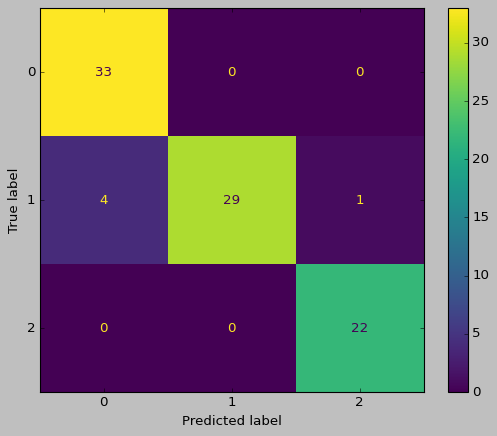

In [8]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

y_pred = classifier_KNN.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        22

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89



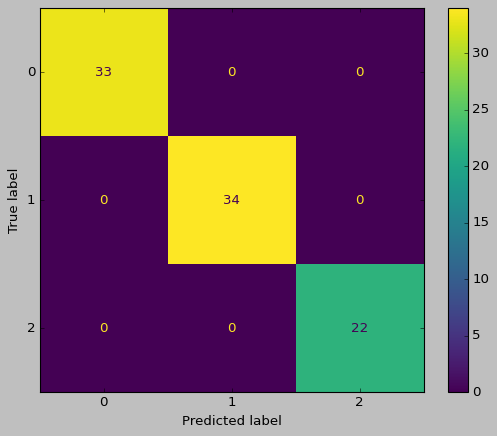

In [9]:
y_pred = classifier_log_reg.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---
